In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.linear_model import Ridge

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

# Loading DataBase



In [6]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
data_path = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

data_path.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


# Data Cleaning.

In [7]:
data_path.isnull().sum()*100/data_path.isnull().count()

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.547945
exterqual         0.000000
extercond         0.000000
foundation        0.000000
                   ...    
bedroomabvgr      0.000000
kitchenabvgr      0.000000
kitchenqual       0.000000
totrmsabvgrd      0.000000
functional        0.000000
fireplaces        0.000000
f

In [8]:
data_path.isnull().sum()*100/data_path.count()

id                   0.000000
mssubclass           0.000000
mszoning             0.000000
lotfrontage         21.565362
lotarea              0.000000
street               0.000000
alley             1504.395604
lotshape             0.000000
landcontour          0.000000
utilities            0.000000
lotconfig            0.000000
landslope            0.000000
neighborhood         0.000000
condition1           0.000000
condition2           0.000000
bldgtype             0.000000
housestyle           0.000000
overallqual          0.000000
overallcond          0.000000
yearbuilt            0.000000
yearremodadd         0.000000
roofstyle            0.000000
roofmatl             0.000000
exterior1st          0.000000
exterior2nd          0.000000
masvnrtype           0.550964
masvnrarea           0.550964
exterqual            0.000000
extercond            0.000000
foundation           0.000000
                     ...     
bedroomabvgr         0.000000
kitchenabvgr         0.000000
kitchenqua

In [9]:
data_path["yearbuilt"].fillna(data_path["yearbuilt"].mean(), inplace=True)
data_path["lotarea"].fillna(data_path["lotarea"].mean(), inplace=True)
data_path["lotfrontage"].fillna(data_path["lotfrontage"].mean(), inplace=True)
data_path["overallqual"].fillna(data_path["overallqual"].mean(), inplace=True)
data_path["overallcond"].fillna(data_path["overallcond"].mean(), inplace=True)

# Detecting outliers

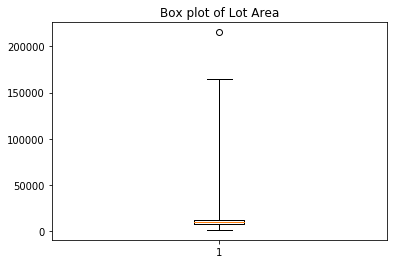

In [74]:

plt.boxplot(data_path["lotarea"],whis=40)
plt.title("Box plot of Lot Area")
plt.show()

In [11]:
data_path['lotfrontage']

0        65.000000
1        80.000000
2        68.000000
3        60.000000
4        84.000000
5        85.000000
6        75.000000
7        70.049958
8        51.000000
9        50.000000
10       70.000000
11       85.000000
12       70.049958
13       91.000000
14       70.049958
15       51.000000
16       70.049958
17       72.000000
18       66.000000
19       70.000000
20      101.000000
21       57.000000
22       75.000000
23       44.000000
24       70.049958
25      110.000000
26       60.000000
27       98.000000
28       47.000000
29       60.000000
           ...    
1430     60.000000
1431     70.049958
1432     60.000000
1433     93.000000
1434     80.000000
1435     80.000000
1436     60.000000
1437     96.000000
1438     90.000000
1439     80.000000
1440     79.000000
1441     70.049958
1442     85.000000
1443     70.049958
1444     63.000000
1445     70.000000
1446     70.049958
1447     80.000000
1448     70.000000
1449     21.000000
1450     60.000000
1451     78.

# Exploratory Data Analysis

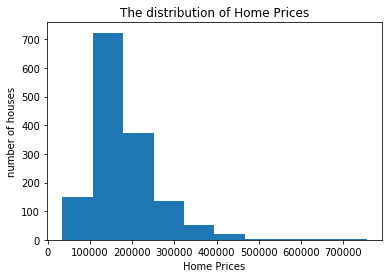

In [12]:
plt.hist(data_path.saleprice)
plt.title("The distribution of Home Prices")
plt.xlabel("Home Prices")
plt.ylabel("number of houses")
plt.show()

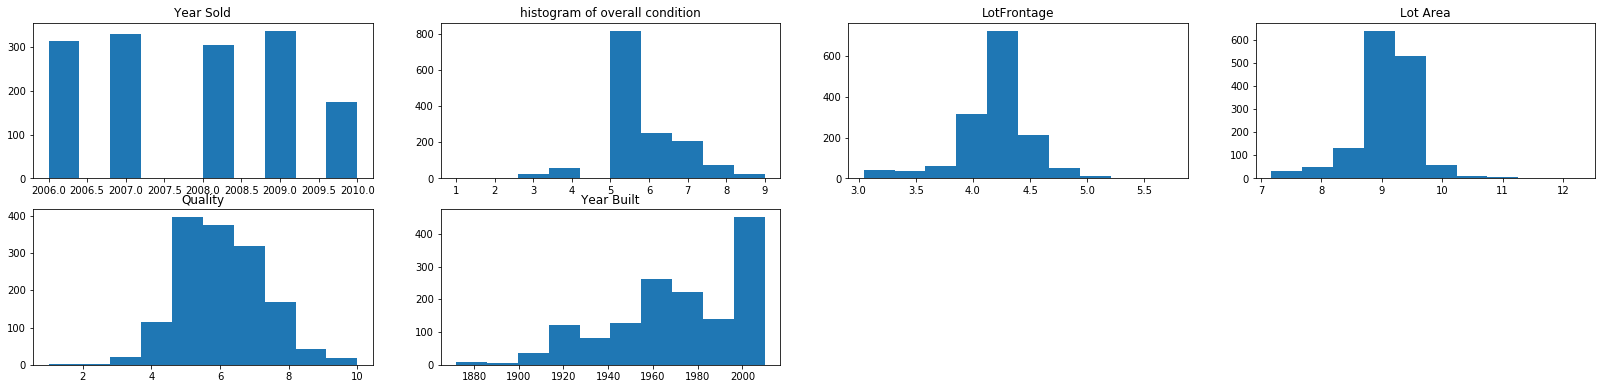

In [13]:
plt.figure(figsize=(28,20))



# histograms of the original data
plt.subplot(6, 4, 1)
plt.hist(data_path["yrsold"])
plt.title("Year Sold")


plt.subplot(6, 4, 2)
plt.hist(data_path["overallcond"])
plt.title("histogram of overall condition")

plt.subplot(6, 4, 3)
plt.hist(np.log(data_path["lotfrontage"]))
plt.title("LotFrontage")

plt.subplot(6, 4, 4)
plt.hist(np.log(data_path["lotarea"]))
plt.title("Lot Area")

plt.subplot(6, 4, 5)
plt.hist(data_path["overallqual"])
plt.title("Quality")


plt.subplot(6, 4, 6)
plt.hist(data_path["yearbuilt"])
plt.title("Year Built")


plt.show()

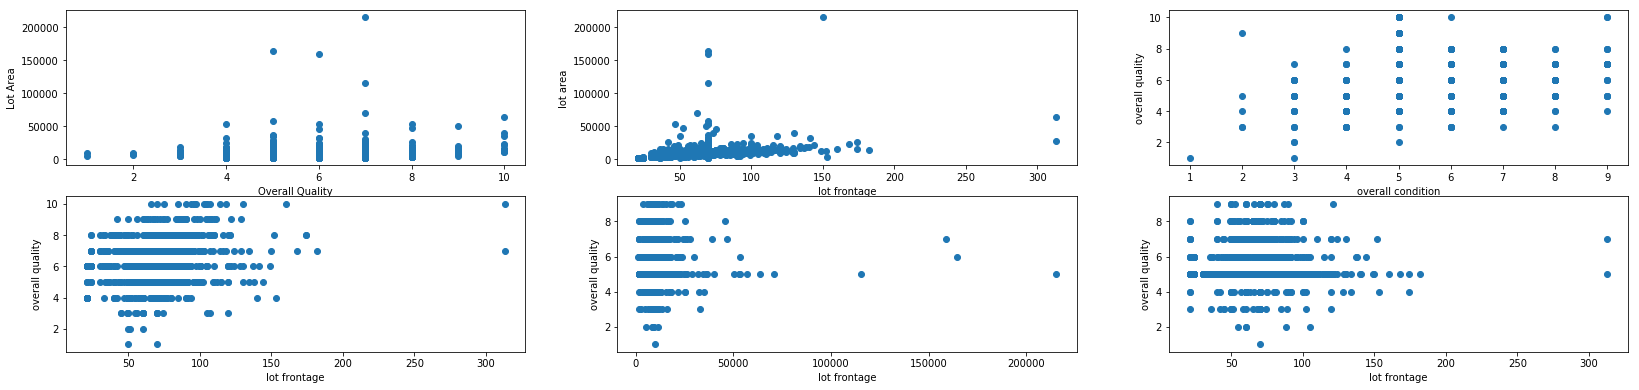

In [14]:

plt.figure(figsize=(28,20))

plt.subplot(6,3,1)
plt.scatter(data_path["overallqual"], data_path["lotarea"])
plt.xlabel('Overall Quality')
plt.ylabel('Lot Area')

plt.subplot(6,3,2)
plt.scatter(data_path["lotfrontage"], data_path["lotarea"])
plt.xlabel('lot frontage')
plt.ylabel('lot area')

plt.subplot(6,3,3)
plt.scatter(data_path["overallcond"], data_path["overallqual"])
plt.xlabel('overall condition')
plt.ylabel('overall quality')

plt.subplot(6,3,4)
plt.scatter(data_path["lotfrontage"], data_path["overallqual"])
plt.xlabel('lot frontage')
plt.ylabel('overall quality')

plt.subplot(6,3,5)
plt.scatter(data_path["lotarea"], data_path["overallcond"])
plt.xlabel('lot frontage')
plt.ylabel('overall quality')


plt.subplot(6,3,6)
plt.scatter(data_path["lotfrontage"], data_path["overallcond"])
plt.xlabel('lot frontage')
plt.ylabel('overall quality')




plt.show()



In [15]:
def standardizing_data(data1,data2):
# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
    dataframe_st = pd.DataFrame()
    dataframe_st['saleprice'] = (data_path['saleprice'] - data_path['saleprice'].mean()) / data_path['saleprice'].std()
    dataframe_st[data1] = (data_path[data1] - data_path[data1].mean()) / data_path[data1].std()

    t = sns.regplot(
    data1,
    'saleprice',
    dataframe_st,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
    )
    t.axhline(0, color='k', linestyle='-', linewidth=2)
    t.axvline(0, color='k', linestyle='-', linewidth=2)
    t.axes.set_title(data2)

    sns.regplot(data1,'saleprice',
            dataframe_st, 
            scatter=False, 
            color="red")

    plt.show()

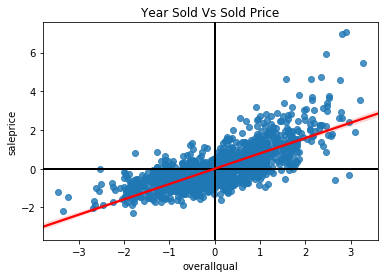

In [16]:
standardizing_data('overallqual',"Year Sold Vs Sold Price")

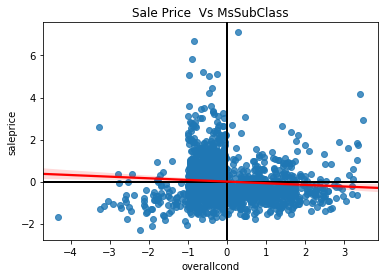

In [17]:
standardizing_data('overallcond',"Sale Price  Vs MsSubClass")

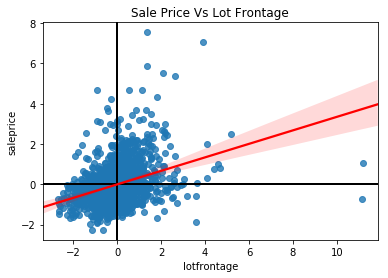

In [18]:
standardizing_data('lotfrontage',"Sale Price Vs Lot Frontage")

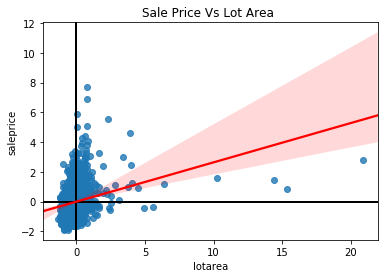

In [40]:
standardizing_data('lotarea',"Sale Price Vs Lot Area ")

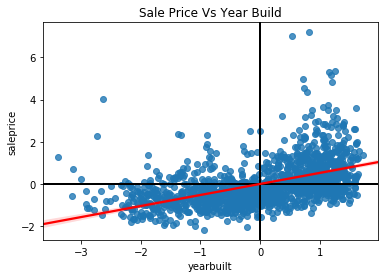

In [41]:
standardizing_data('yearbuilt',"Sale Price Vs Year Build")

# Feature Engineering

-Due to the correlation between lot area and lot frontage.
Lot area is subtracted from Lot Frontage to create lot_size.


-TO find the actual age of the house. Year build is subtracted
from the current year 2019 to create (year_built)

-Overall Quality and condition is combined to provide standerdized 
quality score out of 10.

In [91]:
data_path['lot_size']= (data_path['lotarea']-data_path['lotfrontage'])
data_path['year_built']= (2019 - data_path['yearbuilt'])
data_path['quality']= ((data_path['overallcond']+data_path['overallqual'])/2)
new_data = data_path[['lot_size','year_built','quality']]
new_data.head()

,lot_size,year_built,quality
0,8385.0,16,6.0
1,9520.0,43,7.0
2,11182.0,18,6.0
3,9490.0,104,6.0
4,14176.0,19,6.5


# First model

In [105]:
# Y is the target variable
Y = data_path['saleprice']

# X is the feature set
X = data_path[['lot_size','year_built']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)


# We add constant to the model as it's a best practice
# to do so ever ytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())





                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     288.2
Date:                Sun, 04 Aug 2019   Prob (F-statistic):          2.09e-102
Time:                        21:14:33   Log-Likelihood:                -14591.
No. Observations:                1168   AIC:                         2.919e+04
Df Residuals:                    1165   BIC:                         2.920e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.242e+05   4024.805     55.705      0.0

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


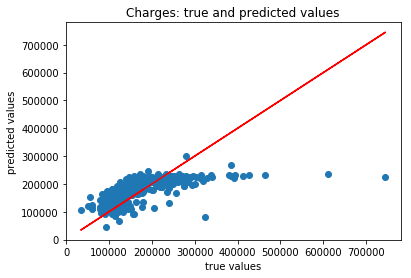

Mean absolute error of the prediction is: 42766.24228858171
Mean squared error of the prediction is: 4260323880.9080544
Root mean squared error of the prediction is: 65271.15657706744
Mean absolute percentage error of the prediction is: 25.023411387322014


In [106]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))




In [94]:
# Y is the target variable
Y = data_path['saleprice']

numerical_cols = [col_name for col_name in data_path.dtypes[data_path.dtypes.values == 'int64'].index 
                    if col_name not in ['lot_size','year_built','quality'] ]

X = data_path[numerical_cols]

X = pd.concat([X**i for i in range(1,21)], axis=1)

# X is the feature set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)


print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


The number of observations in training set is 1168
The number of observations in test set is 292
R-squared of the model in the training set is: 0.9977428730684594
-----Test set statistics-----
R-squared of the model in the test set is: -5.4692705076166715e+20
Mean absolute error of the prediction is: 211423364269620.78
Mean squared error of the prediction is: 3.6719063716541994e+30
Root mean squared error of the prediction is: 1916221900421295.0
Mean absolute percentage error of the prediction is: 72059762129.4875


# Adding a new function

Mortgage Intrest rate indicates the annual cost to borrow money from lender.
Since this dataset takes place betweeen 2006-2010. The average intrest rate is calculated
to add as a new function to the model. This dataset consists of mortage intrest rates from
2006-2010.


In [108]:
new_df = pd.read_csv("MORTGAGE30US (1).csv")


In [109]:
average_rate=(new_df['MORTGAGE30US'].mean())
average_rate=round(average_rate, 1)

In [95]:
data_path['average_rate']=average_rate
function_added_data = data_path[['lot_size','year_built','quality','average_rate']]

In [96]:
data_path[['lot_size','year_built','quality','average_rate']].head(5)

,lot_size,year_built,quality,average_rate
0,8385.0,16,6.0,6.0
1,9520.0,43,7.0,6.0
2,11182.0,18,6.0,6.0
3,9490.0,104,6.0,6.0
4,14176.0,19,6.5,6.0


In [98]:
# Y is the target variable
Y = data_path['saleprice']

# X is the feature set
X = data_path[['lot_size','year_built','quality','average_rate']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)


# We add constant to the model as it's a best practice
# to do so ever ytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())





                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     504.1
Date:                Sun, 04 Aug 2019   Prob (F-statistic):          7.23e-210
Time:                        21:09:57   Log-Likelihood:                -14339.
No. Observations:                1168   AIC:                         2.869e+04
Df Residuals:                    1164   BIC:                         2.871e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
lot_size         1.5910      0.142     11.191   

The R-Squared of this model is 0.56 compared to 0.33 in the previous model.
This indicates that adding of quality and average_rate will be an improvemnt to the
model.



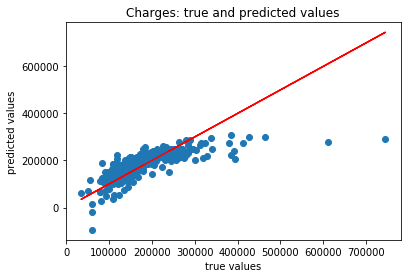

Mean absolute error of the prediction is: 35197.07405549308
Mean squared error of the prediction is: 3032189037.424871
Root mean squared error of the prediction is: 55065.31610210615
Mean absolute percentage error of the prediction is: 21.26027869831482


In [99]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))





In [100]:
# Y is the target variable
Y = data_path['saleprice']

numerical_cols = [col_name for col_name in data_path.dtypes[data_path.dtypes.values == 'int64'].index 
                    if col_name not in ['lot_size','year_built','quality','average_rate'] ]

X = data_path[numerical_cols]

X = pd.concat([X**i for i in range(1,21)], axis=1)

# X is the feature set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))









The number of observations in training set is 1168
The number of observations in test set is 292
R-squared of the model in the training set is: 0.9977428730684594
-----Test set statistics-----
R-squared of the model in the test set is: -5.4692705076166715e+20
Mean absolute error of the prediction is: 211423364269620.78
Mean squared error of the prediction is: 3.6719063716541994e+30
Root mean squared error of the prediction is: 1916221900421295.0
Mean absolute percentage error of the prediction is: 72059762129.4875


In [101]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]
lrm = LinearRegression()

lrm.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.9977428730684594
-----Test set statistics-----
R-squared of the model in test set is: -5.4692705076166715e+20
Mean absolute error of the prediction is: 211423364269620.78
Mean squared error of the prediction is: 3.6719063716541994e+30
Root mean squared error of the prediction is: 1916221900421295.0
Mean absolute percentage error of the prediction is: 72059762129.4875


The R-Squared of this model is 0.99 in the training set and a negative in the test set.
This model overfits the training dataset. 
Due to the large difference in the R-squared value.




# Ridge Model

In [104]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)


y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=7.41254e-17): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.29602e-18): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=9.22417e-18): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=8.22808e-17): result may not be accurate.
  overwrite_a=True).T


Best alpha value is: 1e+38
R-squared of the model in training set is: 0.6488444746870319
-----Test set statistics-----
R-squared of the model in test set is: 0.23032304718426222
Mean absolute error of the prediction is: 51216.59004270914
Mean squared error of the prediction is: 5167383297.687818
Root mean squared error of the prediction is: 71884.51361515788
Mean absolute percentage error of the prediction is: 28.641417024953714


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The R-squared value dropped to 0.64 from 0.99.
Also the R-squared value from the test set has changed to .23.
Which means it has reduced overfitting and has improved.

# Elastic Model

In [103]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Best alpha value is: 1e+20
R-squared of the model in training set is: 0.9019598335731845
-----Test set statistics-----
R-squared of the model in test set is: 0.7172533530485157
Mean absolute error of the prediction is: 29520.353180831695
Mean squared error of the prediction is: 1898277316.9825122
Root mean squared error of the prediction is: 43569.22442484502
Mean absolute percentage error of the prediction is: 17.997273784568236


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


The R-squared value has between the test and training set has imporved in Elastic Net model
from 0.9 to 0.7.

# Lasso Model

In [107]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Best alpha value is: 10000.0
R-squared of the model in training set is: 0.33095773823786856
-----Test set statistics-----
R-squared of the model in test set is: 0.3648554531481545
Mean absolute error of the prediction is: 42771.89098440704
Mean squared error of the prediction is: 4264172535.000473
Root mean squared error of the prediction is: 65300.63196478632
Mean absolute percentage error of the prediction is: 25.03599724529797


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

The R-squared is 0.33 for the train set and 0.36 for the test set.
The difference between the R-squareds of the train and test set is also the lowest. 
The performance statistics on the test set are also the lowest, which means that Lasso 
model performs better than both the Ridge regression,linear regression and Elastic models.